In [1]:
#Manipulação de dados
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#Keras
import keras
from keras import models
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
#To get the name of the images in a list
import glob
from random import shuffle
# import BatchNormalization
from keras.layers.normalization import BatchNormalization

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
IMG_SIZE = 128 #Reflects on main memory consumption'

#Create initial model
modelo = Sequential()

#modelo.add(Conv2D(10, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
modelo.add(Conv2D(10, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Flatten())

#evitar over fit
modelo.add(Dropout(0.5))

modelo.add(Dense(10, activation='relu'))
modelo.add(Dense(10, activation='relu'))
modelo.add(Dense(10, activation='relu'))
modelo.add(Dense(10, activation='relu'))
modelo.add(Dense(10, activation='relu'))
modelo.add(Dense(10, activation='relu'))

modelo.add(Dense(1, activation='relu'))

In [16]:
modelo = Sequential()
modelo.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(BatchNormalization())

modelo.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
modelo.add(AveragePooling2D(pool_size=(2,2)))
modelo.add(BatchNormalization())
model.add(Dropout(0.25))

modelo.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
modelo.add(AveragePooling2D(pool_size=(2,2)))
modelo.add(BatchNormalization())
model.add(Dropout(0.25))

modelo.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
modelo.add(AveragePooling2D(pool_size=(2,2)))
modelo.add(BatchNormalization())
model.add(Dropout(0.25))

modelo.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
modelo.add(AveragePooling2D(pool_size=(2,2)))
modelo.add(BatchNormalization())
model.add(Dropout(0.25))

modelo.add(Flatten())

modelo.add(Dense(512, activation='relu'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.3))

modelo.add(Dense(64, activation='relu'))
modelo.add(Dropout(0.3))

#modelo.add(Dense(32, activation='relu'))
#modelo.add(Dropout(0.3))

#modelo.add(Dense(8, activation='relu'))
#modelo.add(Dropout(0.3))

modelo.add(Dense(2, activation = 'softmax'))

modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 63, 63, 32)        128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 64)        256       
__________

modelo.summary()

#Compilation
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [18]:
def load_training_data():
  train_cats = glob.glob("dogs-vs-cats/train/cat.*")
  train_dogs = glob.glob("dogs-vs-cats/train/dog.*")
  train_data = []

  for img in train_cats:
        img = Image.open(img)
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append([np.array(img), [1,0]])

  for img in train_dogs:
        img = Image.open(img)
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append([np.array(img), [0,1]])
  shuffle(train_data)
  return train_data

In [19]:
dataset = load_training_data()

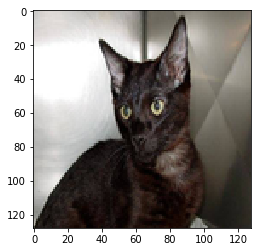

In [20]:
plt.imshow(dataset[6][0])

In [21]:
train_images = np.array([i[0] for i in dataset]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
train_labels = np.array([i[1] for i in dataset])

In [22]:
modelo.fit(train_images, train_labels, epochs=3, verbose=1)

Epoch 1/3
25000/25000 [==============================] - 39s 2ms/step - loss: 0.6799 - acc: 0.6491
Epoch 2/3
25000/25000 [==============================] - 38s 2ms/step - loss: 0.5065 - acc: 0.7521
Epoch 3/3
25000/25000 [==============================] - 39s 2ms/step - loss: 0.4101 - acc: 0.8119


In [ ]:
loss, acc = modelo.evaluate(test_images, test_labels, verbose = 0)
print(acc * 100)